# Week2 授業課題2 富士下山問題


**テキストの目的**
- 数式演算ライブラリのNumPyに慣れる
- 勾配降下法の仕組みを知る

**どのように学ぶか**
- 勾配降下法を下山のたとえた問題を解くプログラムを作成することで、機械学習の基礎的な要素を学びます。

## 富士下山問題
勾配降下法は山や谷を下ることに例えられます。富士山の標高データを 最小化したい目的関数 に見立てて、富士山からの下山プログラムを作成することで勾配降下法を学びます。

**標高データの取得**

標高データはcsvファイルを配布します。以下のコードで読み込むことができます。

In [1]:
import numpy as np
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt("week2_session1_mtfuji_data.csv",delimiter=",", skiprows=1)
print(fuji[130:140])
print(fuji.shape)

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]
(300, 5)


左から順番に「その地点の番号」「緯度」「経度」「標高」「地点0からの距離」となっています。標高と距離の単位はメートルです。300地点のデータです。

## 【問題1】データの可視化

Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

この断面図を見れば低い場所はすぐに分かりますが、今回は暗闇の中で足元の勾配のみが知れるという状況を想像します。


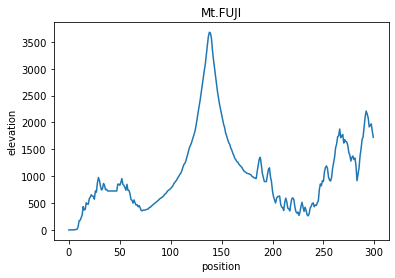

In [93]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.title("Mt.FUJI")
plt.xlabel("position")
plt.ylabel("elevation")
plt.plot(fuji[:,0], fuji[:,3])
plt.show()

## 【問題2】ある地点の勾配を計算する関数を作成

「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。

「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。

In [94]:
def cul_gradient(position, elevations):
    """
    「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数
    
    Parameteres
    --------------
    position : int
        今いる地点の番号
    elevations : ndarray, shape(n,)
        標高
    
    Returns
    --------------
    gradient : numpy.float
        今いる地点の勾配
    """
    gradient = (elevations[position] - elevations[position-1])/(position - (position-1))
    return gradient

# 130番
position = 130
elevations = fuji[:, 3]
print("{}番地点の標高は：{}メートル".format(position, elevations[130])) #冒頭標高データセットのデータと確認
print("{}番地点の勾配は：{}".format(position, cul_gradient(position, elevations)))

130番地点の標高は：2563.4メートル
130番地点の勾配は：137.30000000000018


## 【問題3】移動先の地点を計算する関数を作成

今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。

In [95]:
def cul_next_position(position, elevations, alpha=0.2):
    """
    移動先の地点を計算する関数

    Parameters
    ----------------
    position : int
        今いる地点の番号
    elevations : ndarray, shape(n,)
        標高
    alpha : float or int
        0より大きい任意の値をとるハイパーパラメータ

    Returns
    ----------------
    next_position : int
        次に移動する地点
    """
    next_position = round(position - alpha*cul_gradient(position, elevations)) #「移動先の地点 = 今いる地点 - α×今いる地点の勾配」
    return next_position

In [96]:
# 130番
position = 130
elevations = fuji[:, 3]
next_position = cul_next_position(position, elevations, alpha=0.2)

print("{}番地点の標高は：{}メートル".format(position, elevations[130])) #冒頭標高データセットのデータと確認
print("{}番地点のの次に移動する地点は：{}".format(position, next_position))

130番地点の標高は：2563.4メートル
130番地点のの次に移動する地点は：103


## 【問題4】山を下る関数を作成
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。

最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。

**《実装上の注意》**

問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [97]:
def cul_next_position_downhill(initial_positon, elevations, alpha=0.2):
    """
    山を下る関数

    Parameters
    ----------------
    initial_positon : int
        最初の地点の番号
    elevations : ndarray, shape(n,)
        標高
    alpha : float or int
        0より大きい任意の値をとるハイパーパラメータ

    Returns
    ----------------
    positions : list of int
        移動毎の地点の番号のリスト
    """
    positions = [initial_positon]
    while positions[-1] not in positions[:-1]:
        positions.append(cul_next_position(positions[-1], elevations, alpha=alpha))
    return positions[:-1]

In [98]:
initial_positon = 136
elevations = fuji[:, 3]
position_list = cul_next_position_downhill(initial_positon, elevations, alpha=0.2)
print("下山過程の移動先時点リスト: ", position_list)

下山過程の移動先時点リスト:  [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


## 【問題5】下山過程の可視化

問題4における下山過程をMatplotlibを使いグラフで可視化してください。

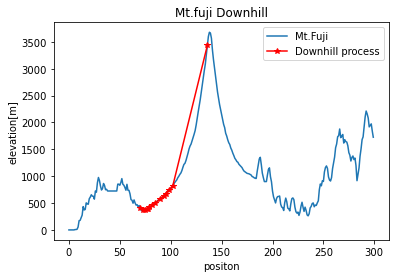

In [99]:
plt.title("Mt.fuji Downhill")
plt.xlabel("positon")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0], fuji[:,3], label='Mt.Fuji')
plt.plot(position_list, elevations[position_list], marker='*', label='Downhill process', color="red")
plt.legend()
plt.show()

## 【問題6】初期値の変更

問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。

**《初期値とは》**

今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なるの斜面を下ることになります。

In [117]:
downhill_process_lists = []
for i in range(len(fuji)):
    downhill_process_lists.append(cul_next_position_downhill(initial_positon, elevations, alpha=0.2))
print(len(downhill_process_lists)-1, "通り")

299 通り


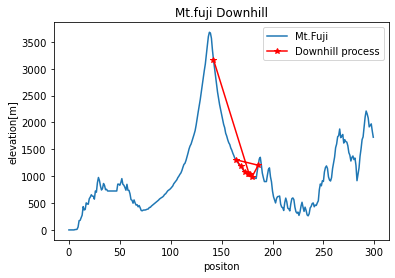

In [103]:
# 初期値142の場合
initial_positon = 142 
elevations = fuji[:, 3]
position_list = cul_next_position_downhill(initial_positon, elevations, alpha=0.2)

plt.title("Mt.fuji Downhill")
plt.xlabel("positon")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0], fuji[:,3], label='Mt.Fuji')
plt.plot(position_list, elevations[position_list], marker='*', label='Downhill process', color="red")
plt.legend()
plt.show()

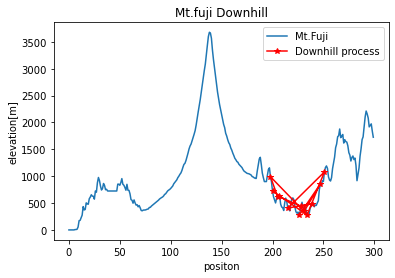

In [104]:
# 初期値200の場合
initial_positon = 200
elevations = fuji[:, 3]
position_list = cul_next_position_downhill(initial_positon, elevations, alpha=0.2)

plt.title("Mt.fuji Downhill")
plt.xlabel("positon")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0], fuji[:,3], label='Mt.Fuji')
plt.plot(position_list, elevations[position_list], marker='*', label='Downhill process', color="red")
plt.legend()
plt.show()

## 【問題7】（アドバンス問題）ハイパーパラメータの変更
ハイパーパラメータ 
α
 を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

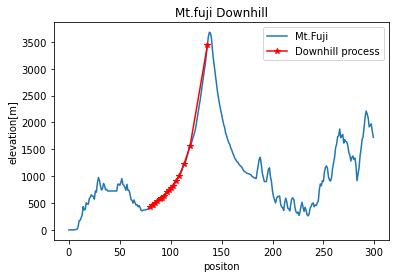

In [123]:
# 初期値136,alpha=0.1の場合
initial_positon = 136 
elevations = fuji[:, 3]
position_list = cul_next_position_downhill(initial_positon, elevations, alpha=0.1)

plt.title("Mt.fuji Downhill")
plt.xlabel("positon")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0], fuji[:,3], label='Mt.Fuji')
plt.plot(position_list, elevations[position_list], marker='*', label='Downhill process', color="red")
plt.legend()
plt.show()

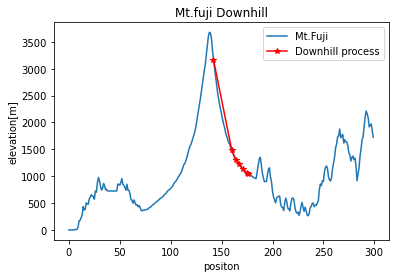

In [118]:
# 初期値142,alpha=0.1の場合
initial_positon = 142 
elevations = fuji[:, 3]
position_list = cul_next_position_downhill(initial_positon, elevations, alpha=0.1)

plt.title("Mt.fuji Downhill")
plt.xlabel("positon")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0], fuji[:,3], label='Mt.Fuji')
plt.plot(position_list, elevations[position_list], marker='*', label='Downhill process', color="red")
plt.legend()
plt.show()

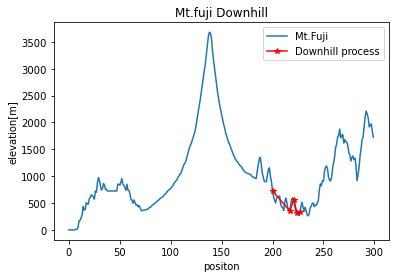

In [119]:
# 初期値200,alpha=0.1の場合
initial_positon = 200
elevations = fuji[:, 3]
position_list = cul_next_position_downhill(initial_positon, elevations, alpha=0.1)

plt.title("Mt.fuji Downhill")
plt.xlabel("positon")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0], fuji[:,3], label='Mt.Fuji')
plt.plot(position_list, elevations[position_list], marker='*', label='Downhill process', color="red")
plt.legend()
plt.show()